# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [1]:
pip install pyclustering

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)


# Questoin 1
Scatter plot the dataset

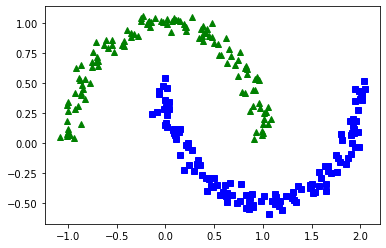

In [3]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")


# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

I don't think it will preform well as three is intersction between the two classes

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

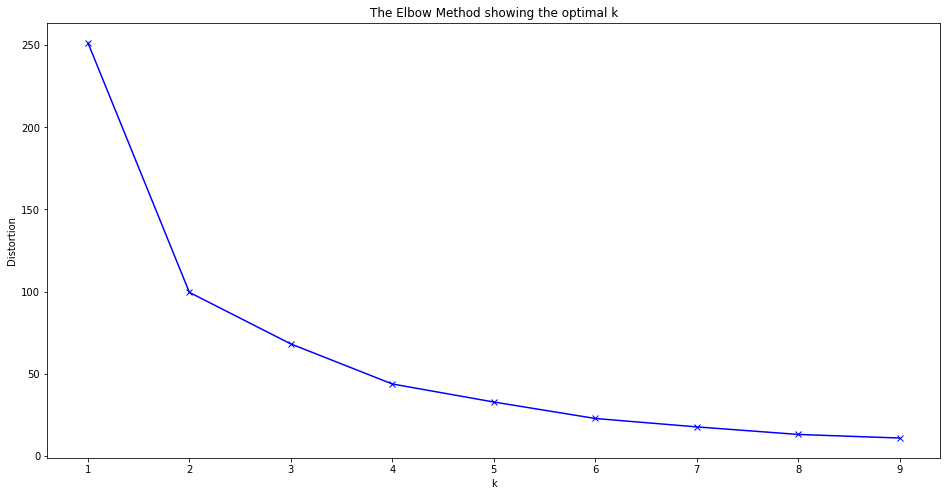

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[ 1.19954086 -0.07033668]
 [-0.21580413  0.58471364]]


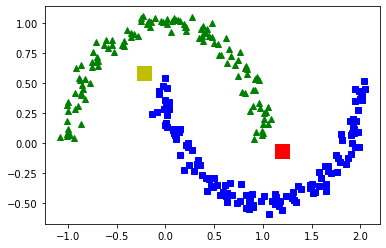

In [4]:
#1 best K value is 3
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X,y)
    distortions.append(kmeanModel.inertia_)
#2
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#3
kmean2 = KMeans(n_clusters=2)
kmean2.fit(X,y)
kmean3 = KMeans(n_clusters=3)
kmean3.fit(X,y)

print(kmean2.cluster_centers_)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.scatter( 1.19954086, -0.07033668, s=200, c='r', marker='s')
plt.scatter(-0.21580413,  0.58471364, s=200, c='y', marker='s')
plt.show()


#4
# when k is 2 it is misclustering high portion of the data, it gets better when k=3 but both of them is not the optimum method to cluster data

In [38]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

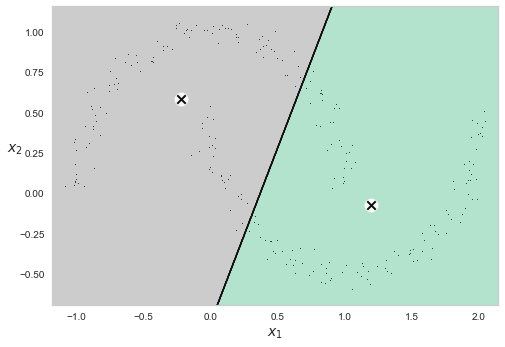

In [39]:
plot_decision_boundaries(kmean2,X)


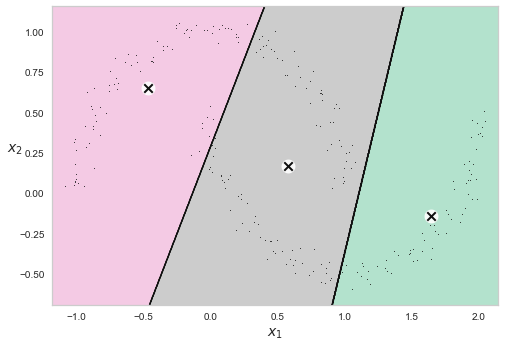

In [40]:
plot_decision_boundaries(kmean3,X)


In [41]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


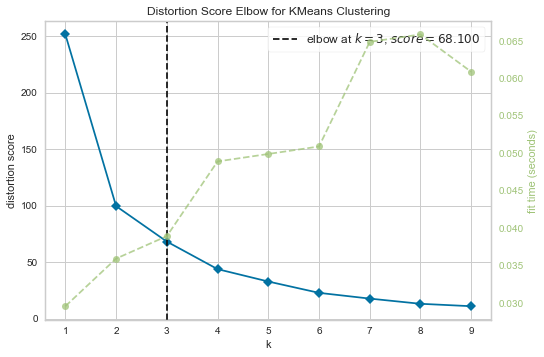

3


In [42]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
print(visualizer.elbow_value_) # Get elbow value

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

#1 
as there is no outliers in the data and we want to include all ponints in only 2 clusters, 0 is a good choice for threshold

#2 
8 is a good choice for interval computaionally and result-wise

#3
Clique preforms on overlapping clusters better than K-means as clustering in clique is maximal set of connected dense units within subspace

Amount of clusters: 2


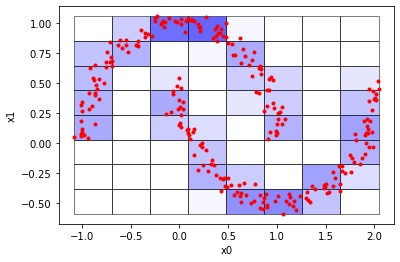

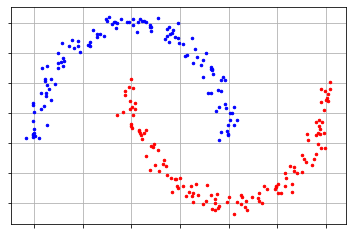

In [5]:
intervals = 8 # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(X, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [6]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

[[-2.67884871  0.77010818]
 [-3.28695619  3.08864448]]


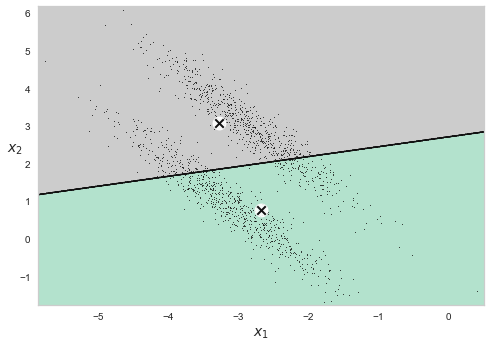

In [46]:
#1
kmean3 = KMeans(n_clusters=2)
kmean3.fit(X_aniso,y)
print(kmean3.cluster_centers_)
plot_decision_boundaries(kmean3,X_aniso)




Amount of clusters: 4


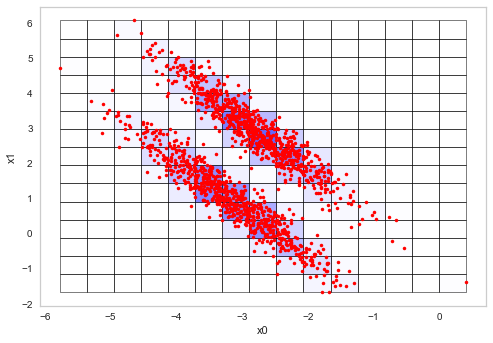

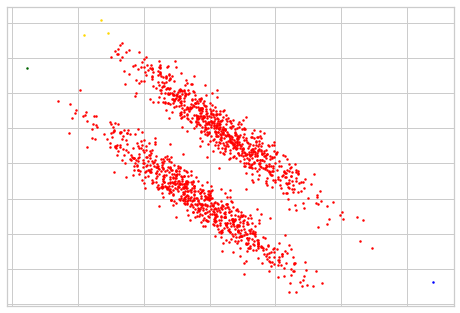

In [47]:
#2
intervals = 15 # defines amount of cells in grid in each dimension
threshold = 0  # lets consider each point as non-outlier
clique_instance = clique(X_aniso, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()    
cells = clique_instance.get_cells()     
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, X_aniso)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X_aniso, clusters, noise)  # show clustering results

#4.number of clusters in clique is 4 as there are outliers and even the threshold is zero there are individual points that are clustered in seperate group

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [7]:
def pca_data(data):
    mean = data.mean()
    centered_data = data-mean
    features = data.T
    cov_mtx = np.cov(features)
    values, vectors = np.linalg.eig(cov_mtx)
    transformed_data = centered_data.dot(vectors.T[0])
    return vectors , values , transformed_data


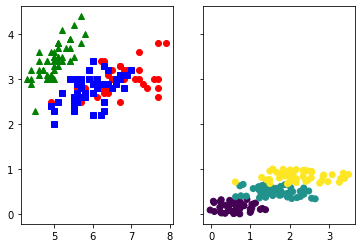

In [8]:
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
X=X[:,0:2]
vec , val , trans = pca_data(X)
ylim = np.linspace(0,1,len(trans))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(X[:, 0][y==2], X[:, 1][y==2], "ro")
ax1.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
ax1.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
ax2.scatter(trans , ylim, c=y)

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [9]:
from scipy.spatial import distance
def kmeans(x,k):
    idx = np.random.choice(len(x), k, replace=True) #k numbers in range of length of x 
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = distance.euclidean(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(100): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
       
         
    return centroids 
